# Project 5 Investment cycles
### Authors Piotr Snopek Jakub Caputa

Y - national income
R - interest

In [43]:
from scipy.integrate import odeint

In [2]:
%matplotlib inline

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 100

In [3]:
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

# Base model

In [3]:
model_params = {
     "α_M": 0.8, #Proportion of money in use
    "beta_12": 1, #
    "beta_1": 0.49,
    "beta_2": 0.49,
    "beta_3": 1.1,
    "l1": 0.1,
    "l2": 2,
    "y0": 0.9 ,
    "r0": 0.1,
    "alfa": 0.5,
    "beta": 1.1,
    "l_s": 0.1 # M( constant money supply)
    
}

In [4]:
def I(y, r):
    return 1/(1+math.exp(-y)) - model_params["beta_1"] * r

def S(y, r):
    return (model_params['l1'] * y) + (model_params["beta_2"] * r)

def L(y, r):
    return (model_params["l2"] * y) - (model_params["beta_3"] * r)

def Keyness_model(y_prev, r_prev):
    i = I(y_prev, r_prev)
    y = model_params["alfa"] * (I(y_prev, r_prev) - S(y_prev, r_prev))
    r = model_params["beta"]* (L(y_prev, r_prev) - model_params["l_s"])
    return y, r, i

In [5]:
Y = [model_params["y0"]]
R = [model_params["r0"]]
I2 = []
T=100
for dt in range(0, T):
    y, r, i = Keyness_model(Y[dt], R[dt])
    Y.append(y)
    R.append(r)
    I2.append(i)
    #print(Y)
    #print(R)
    #print(I2)
    #print(" - ")


    

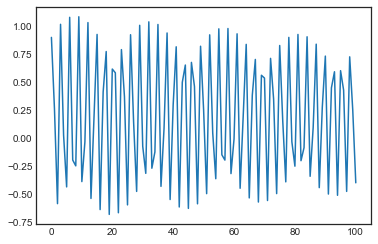

In [6]:
plt.plot(Y)

In [7]:
def main(l1, l2, l_s, alfa, beta1, beta2, beta3, beta):  # 
    def I(y, r):
        return 1/(1+math.exp(-y)) - beta1 * r

    def S(y, r):
        return (l1 * y) + (beta2 * r)

    def L(y, r):
        return (l2 * y) - (beta3 * r)

    def Keyness_model(y_prev, r_prev):
        y = alfa * (I(y_prev, r_prev) - S(y_prev, r_prev))
        r = beta* (L(y_prev, r_prev) - l_s)
        return y, r
    
    y_0 = 0.9
    r_0 = 0.1
    Y = [y_0]
    R = [r_0]
    I2 = []
    T=40
    for dt in range(0, T):
        y, r = Keyness_model(Y[dt], R[dt])
        Y.append(y)
        R.append(r)

    time = np.linspace(0, T, T+1)
    
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(time, Y, label='Y(national income)')
    ax.plot(time, R, label='R(Interest)')
    ax.legend(loc='best')
    ax.grid()

    plt.show()

interact(main, alfa=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='alfa', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=1.5, step=0.01, value=1.1, description='beta', style=style, layout=slider_layout),
               l1=FloatSlider(min=0, max=3, step=0.01, value=0.56, description='l1', style=style, layout=slider_layout),
               l2=FloatSlider(min=0, max=3, step=0.01, value=1.5, description='l2', style=style, layout=slider_layout),
               l_s=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='l_s', style=style, layout=slider_layout),
               beta1=FloatSlider(min=0, max=1.5, step=0.01, value=0.49, description='beta1', style=style, layout=slider_layout),
               beta2=FloatSlider(min=0, max=1.5, step=0.01, value=0.49, description='beta2', style=style, layout=slider_layout),
               beta3=FloatSlider(min=0, max=1.5, step=0.01, value=1.1, description='beta3', style=style, layout=slider_layout)     
        );

interactive(children=(FloatSlider(value=0.56, description='l1', layout=Layout(width='99%'), max=3.0, step=0.01…

Model w dobry sposób przedstawia okresowość na rynku, jednak nie opisuje realnego procesu, ponieważ jego wartości wchodzą w wartości ujemne.

# Modified Keynes Model

In [8]:
def main(l0, l1, l2, l_s, alfa, beta1, beta2, beta3, beta, K, a1):   
    def I(y):
        return l0*K/(l0+(K-l0) * math.exp(-1*a1*y))

    def S(y, r):
        return (l1 * y) + (beta1+beta2) * r * y

    def L(y, r):
        return r*((l2 * y) - (beta3 * r) - l_s)

    def Keyness_model(y_prev, r_prev):
        y = alfa * (I(y_prev) - S(y_prev, r_prev))
        r = beta* L(y_prev, r_prev)
        return y, r
    
    y_0 = 0.025
    r_0 = 0.12
    Y = [y_0]
    R = [r_0]
    I2 = []
    T=40
    for dt in range(0, T):
        y, r = Keyness_model(Y[dt], R[dt])
        Y.append(y)
        R.append(r)

    time = np.linspace(0, T, T+1)
    
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(time, Y, label='Y(national income)')
    ax.plot(time, R, label='R(Interest)')
    ax.legend(loc='best')
    ax.grid()

    plt.show()

interact(main, alfa=FloatSlider(min=0, max=10, step=0.01, value=2, description='alfa', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=10, step=0.01, value=6.1, description='beta', style=style, layout=slider_layout),
               l0=FloatSlider(min=0, max=0.1, step=0.001, value=0.005, description='l0', style=style, layout=slider_layout),
               l1=FloatSlider(min=0, max=3, step=0.01, value=0.0, description='l1', style=style, layout=slider_layout),
               l2=FloatSlider(min=0, max=3, step=0.01, value=0.35, description='l2', style=style, layout=slider_layout),
               l_s=FloatSlider(min=0, max=1.5, step=0.01, value=0.29, description='l_s', style=style, layout=slider_layout),
               beta1=FloatSlider(min=0, max=2, step=0.01, value=1, description='beta1', style=style, layout=slider_layout),
               beta2=FloatSlider(min=0, max=1.5, step=0.01, value=1, description='beta2', style=style, layout=slider_layout),
               beta3=FloatSlider(min=0, max=1.5, step=0.01, value=1, description='beta3', style=style, layout=slider_layout),
               K=FloatSlider(min=0, max=10, step=0.01, value=1, description='K', style=style, layout=slider_layout),
               a1=FloatSlider(min=0, max=6, step=0.01, value=4, description='a1', style=style, layout=slider_layout)
         
        );

interactive(children=(FloatSlider(value=0.005, description='l0', layout=Layout(width='99%'), max=0.1, step=0.0…

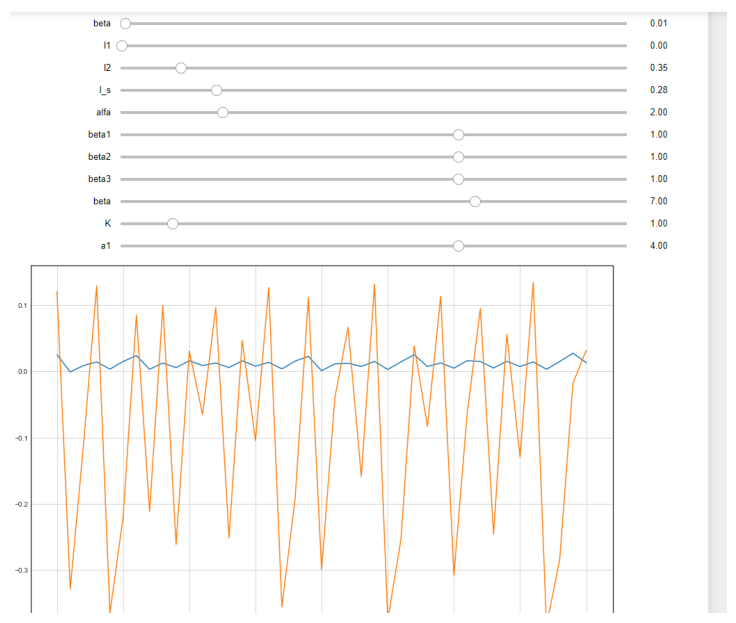

In [84]:
from PIL import Image

image = Image.open('D:/DOWNLOADFILES91218/modied_model.PNG')
plt.rcParams["figure.figsize"] = (14,8)
plt.axis('off')
plt.imshow(image)

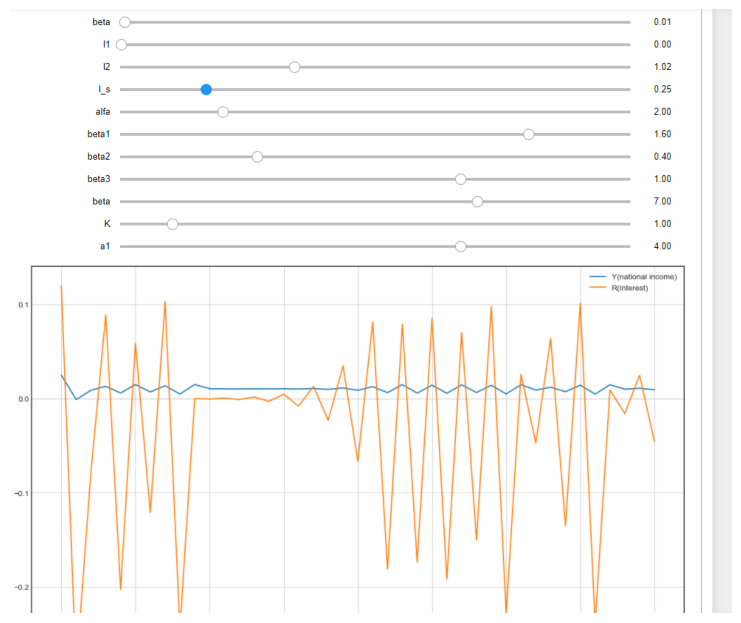

In [88]:
image = Image.open('D:/DOWNLOADFILES91218/modified_model2.PNG')
plt.rcParams["figure.figsize"] = (14,8)
plt.axis('off')
plt.imshow(image)

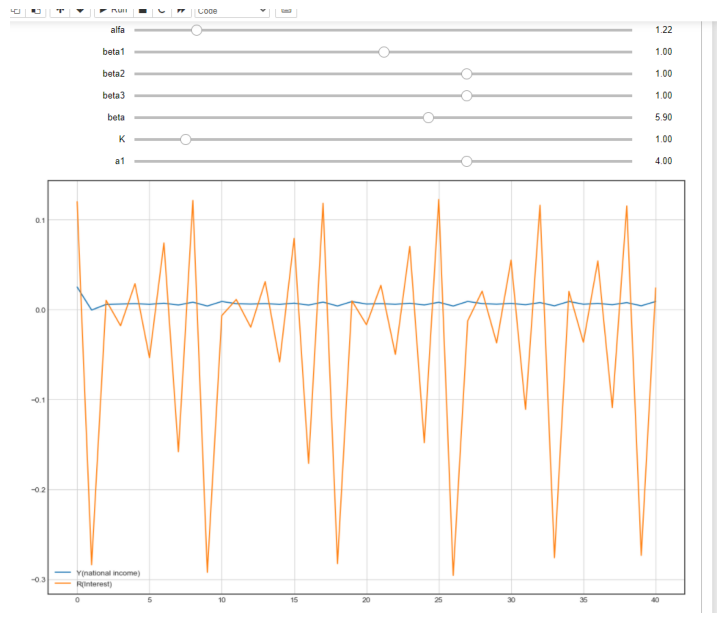

In [96]:
image = Image.open('D:/DOWNLOADFILES91218/model3.PNG')
plt.rcParams["figure.figsize"] = (14,8)
plt.axis('off')
plt.imshow(image)

# Model 9d

In [64]:
def main(ALPHA_R,ALPHA_P,ALPHA_M,ALPHA_F,ALPHA_INV,T_WAGE,T_EMPL,A,LAMBDA,Y_SAVE,T_DEP,G_MAX,L_MAX): 
    def Model(params,t):
        F, M, H, K, L, p, w, G_INV, r = params
        if L_MAX < L:
            L_MAX_NEW = L
        else:
            L_MAX_NEW = L_MAX
    
        C = (1 - Y_SAVE * (1 + r)) * (1/p) * ALPHA_M * M # ok
        I = G_INV * (1/p) * ALPHA_F * F # ok
        D = C + I # ok
        Y = D #A * math.pow(L, LAMBDA) * math.pow(K, 1 - LAMBDA)
        Ld = (8 * math.pow(p, 3) * K * math.pow(A, 3))/(27 * math.pow(w, 3)) # ok
        Le = min(L_MAX_NEW, Ld)
        S = Y_SAVE * (1 + r) * ALPHA_M * M
        PI = p * D - w * L
        Div = ALPHA_F * F - p * I
        PIn = PI - (1 / T_DEP) * p * K

        # to jest ok
        dFdt = PI + S - Div - (p * I)
        dHdt = Y - D
        dKdt = (-1/T_DEP) * K  + I
        dLdt = (-1/T_EMPL) * (L - Le)
        dMdt = ((w * L) + Div) - ((p * C) + S)
        dpdt = 0 # -1 * ((p * ALPHA_P * H)/D)

        dwdt = (w/T_WAGE) * (Ld - L)

        if PIn/(p * K) >= r:
            dG_INVdt = ALPHA_INV * (G_MAX - G_INV) * ( ( PIn/(p * K) ) - r)
        else:
            dG_INVdt = ALPHA_INV * G_INV * ( ( PIn/(p * K) ) - r)

        drdt = ALPHA_R * r * (((w * L) + Div) - ((p * C ) + S))

        return dFdt, dMdt, dHdt, dKdt, dLdt , dpdt, dwdt, dG_INVdt, drdt
    
    # Starting Params
        
    T = 1000
    t = np.linspace(0, 1000, T)
    
    F = np.empty_like(t)
    H = np.empty_like(t)
    K = np.empty_like(t)
    L = np.empty_like(t)
    M = np.empty_like(t)
    p = np.empty_like(t)
    w = np.empty_like(t)
    G_INV = np.empty_like(t)
    r = np.empty_like(t)

    F[0], M[0], H[0], K[0], L[0], p[0], w[0], G_INV[0], r[0] = \
                            37, 58, 0, 43.5, 163.6, 1.56, 0.19, 0.46, 0.025
    
    params = [F[0],M[0],H[0],K[0],L[0],p[0], w[0], G_INV[0],r[0]]

    
    C = [(1 - Y_SAVE * (1 + r[0])) * (1/p[0]) * ALPHA_M * M[0]]
    S = [Y_SAVE * (1 + r[0]) * ALPHA_M * M[0]]
    I = [G_INV[0] * (1/p[0]) * ALPHA_F * F[0]]
    Div = [ALPHA_F * F[0] - p[0] * I[0]]
    
    for i in range(1, T):
        tspan = [t[i-1],t[i]]
        result = odeint(Model, params, tspan)
        F[i], M[i], H[i], K[i], L[i] , p[i], w[i], G_INV[i], r[i] = result[1]
        
        C.append((1 - Y_SAVE * (1 + r[i])) * (1/p[i]) * ALPHA_M * M[i])
        S.append(Y_SAVE * (1 + r[i]) * ALPHA_M * M[i])
        I.append(G_INV[i] * (1/p[i]) * ALPHA_F * F[i])
        Div.append(ALPHA_F * F[i] - p[i] * I[i])

        params = result[1]
        
    time = np.linspace(0, T, T)
    
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(time, F, label='F(t)')
    ax.plot(time, M, label='M(t)')
    ax.plot(time, K, label='K(t)')
    ax.legend(loc='best')
    ax.grid()

    plt.show()

interact(main, Q1=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q1', style=style, layout=slider_layout),
               Q2=FloatSlider(min=0, max=100, step=0.5, value=95, description='Q2', style=style, layout=slider_layout),
               Q3=FloatSlider(min=0, max=100, step=0.5, value=82.635, description='Q3', style=style, layout=slider_layout),
               ALPHA_R=FloatSlider(min=0, max=3, step=0.01, value=0.1, description='ALPHA_R', style=style, layout=slider_layout),
               ALPHA_P=FloatSlider(min=0, max=1.5, step=0.01, value=0.036, description='ALPHA_P', style=style, layout=slider_layout),
               ALPHA_M=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_M', style=style, layout=slider_layout),
               ALPHA_F=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='ALPHA_F', style=style, layout=slider_layout),
               ALPHA_INV=FloatSlider(min=0, max=3, step=0.01, value=2, description='ALPHA_INV', style=style, layout=slider_layout),  
               T_WAGE=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_WAGE', style=style, layout=slider_layout), 
               T_EMPL=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='T_EMPL', style=style, layout=slider_layout),  
               A=FloatSlider(min=0, max=1.5, step=0.01, value=0.1, description='A', style=style, layout=slider_layout),  
               LAMBDA=FloatSlider(min=0, max=1, step=0.01, value=9.3 * 0.03, description='LAMBDA', style=style, layout=slider_layout),  
               Y_SAVE=FloatSlider(min=0, max=1.5, step=0.01, value=0.3, description='Y_SAVE', style=style, layout=slider_layout),  
               T_DEP=FloatSlider(min=0, max=6, step=0.01, value=5, description='T_DEP', style=style, layout=slider_layout),  
               G_MAX=FloatSlider(min=0, max=1.5, step=0.01, value=0.8, description='G_MAX', style=style, layout=slider_layout),  
               L_MAX=FloatSlider(min=0, max=300, step=1, value=200, description='L_MAX', style=style, layout=slider_layout)
        );

interactive(children=(FloatSlider(value=0.1, description='ALPHA_R', layout=Layout(width='99%'), max=3.0, step=…